In [62]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\heart.csv")

In [ ]:
#dataset courtesy of Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [65]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [68]:
#scale data for better predictions

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
#define the Dense layers and activation functions

nn = tf.keras.Sequential()

nn.add(Dense(30, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(15, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

nn.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 686 samples, validate on 339 samples
Epoch 1/1000
686/686 [==============================] - 1s 2ms/sample - loss: 0.7208 - accuracy: 0.5000 - val_loss: 0.6435 - val_accuracy: 0.7050
Epoch 2/1000
686/686 [==============================] - 0s 169us/sample - loss: 0.6386 - accuracy: 0.6429 - val_loss: 0.5715 - val_accuracy: 0.7935
Epoch 3/1000
686/686 [==============================] - 0s 130us/sample - loss: 0.5726 - accuracy: 0.7172 - val_loss: 0.5147 - val_accuracy: 0.8171
Epoch 4/1000
686/686 [==============================] - 0s 194us/sample - loss: 0.5261 - accuracy: 0.7726 - val_loss: 0.4682 - val_accuracy: 0.8378
Epoch 5/1000
686/686 [==============================] - 0s 210us/sample - loss: 0.4805 - accuracy: 0.7974 - val_loss: 0.4318 - val_accuracy: 0.8407
Epoch 6/1000
686/686 [==============================] - 0s 197us/sample - loss: 0.4552 - accuracy: 0.8192 - val_loss: 0.4038 - val_accuracy: 0.8348
Epoch 7/1000
686/686 [==============================] - 0s 122us/sam

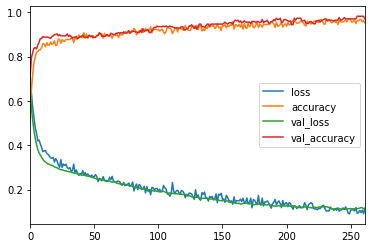

In [70]:
#plot the model loss

model_loss = pd.DataFrame(nn.history.history)
model_loss.plot()

In [71]:
nn.evaluate(X_test, y_test, verbose=0)

[0.11465661724408467, 0.9705015]

In [72]:
nn.evaluate(X_train, y_train, verbose=0)

[0.038857235706278255, 0.9941691]

In [24]:
pred = nn.predict(X_test)

In [30]:
pred = pd.Series(pred.reshape(339,))

In [36]:
pred_df = pd.DataFrame(y_test,columns=['Tes True Y'])

In [37]:
pred_df = pd.concat([pred_df, pred], axis=1)

In [40]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [41]:
pred_df.head()

,Test True Y,Model Predictions
0,0,0.003181
1,0,0.004824
2,0,0.123287
3,1,0.992548
4,0,0.001998


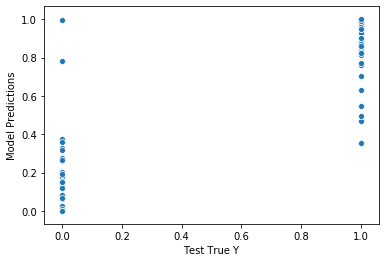

In [42]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.06568191901596598

In [49]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.02833603497919513

In [23]:
predictions = nn.predict_classes(X_test)

In [48]:
#test the accuracy of the network

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       165
           1       0.97      0.97      0.97       174

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339

[[159   6]
 [  5 169]]


In [56]:
X_new = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
X_new = scaler.transform(X_new)
nn.predict_classes(X_new)

array([[0]])

In [57]:
X_new2 = [[59,1,1,140,221,0,1,164,1,0.0,2,0,2]]
X_new2 = scaler.transform(X_new2)
nn.predict_classes(X_new2)

array([[1]])

In [58]:
from tensorflow.keras.models import load_model

In [59]:
nn.save("heart_disease_model.h5")

In [60]:
later_model = load_model("heart_disease_model.h5")

In [61]:
later_model.predict_classes(X_new2)

array([[1]])